# Question 02 
## Use any datasets from Kaggle competition not earlier than 2020, compare and analyze the performance of decision trees on that dataset (with different hyper-parameter tuning) using F-measure and Accuracy. Plot performance curves and discuss. Use 10 Fold Cross Validation and random train/test split (70%, 30%).

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


data = pd.read_csv(r"C:\Users\Bilal\Desktop\AML Assignment 02\drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [35]:
X_encoded = pd.get_dummies(data, columns=['Sex', 'BP','Cholesterol', 'Na_to_K'], drop_first=True)



X = X_encoded.drop('Drug', axis=1) 
y = X_encoded['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

cv_scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')


In [36]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

    Actual Predicted
95   drugX     drugX
15   drugY     drugY
30   drugX     drugX
158  drugC     drugY
128  drugY     drugY


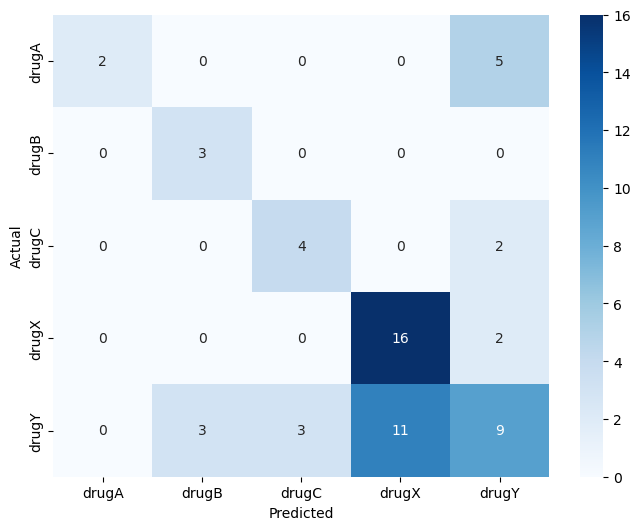

In [37]:


conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

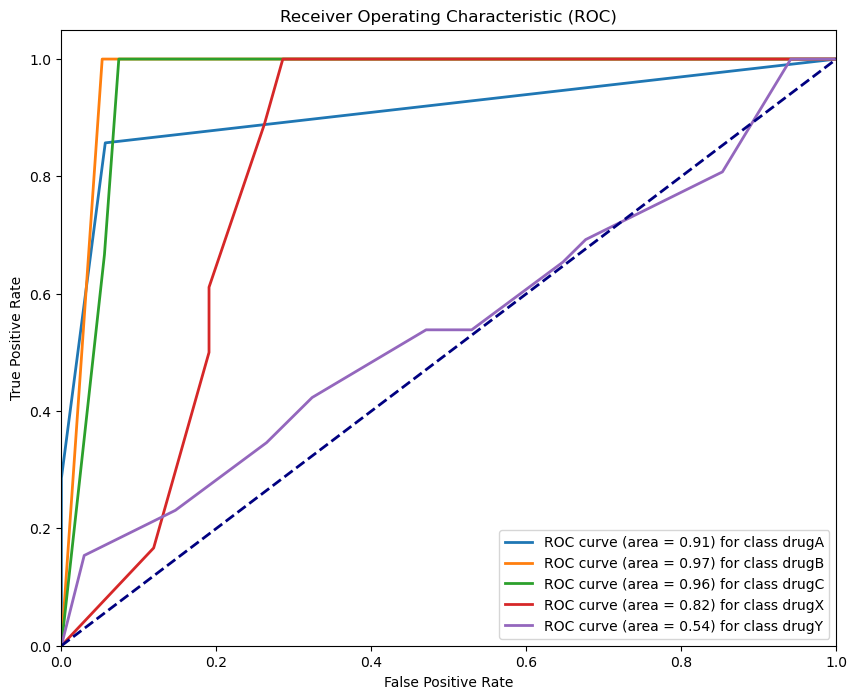

In [38]:


y_bin = label_binarize(y_test, classes=clf.classes_) 

y_probs = clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(10, 8))

for i in range(len(clf.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], clf.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# Observations

After looking at the ROC curve, we can say that the model is doing a good job at predicting durg classes A, B, C and X but it struggles with predicting drug class Y.